In [16]:
import numpy as np
import os.path 
import json
import cv2 as cv


In [17]:
saved_path = "C:/Users/20716400/Documents/Unreal Projects/ExtractJointLocation/Saved"

intrinsic_path = saved_path + "//CameraData//CineCameraActor_0//Intrinsics_CineCameraActor_0.json"
extrinsic_path = saved_path + "//CameraData//CineCameraActor_0//Extrinsics_CineCameraActor_0.json"

face_subset_path = saved_path +  "/FaceSubset/BP_Carl_C_1_FaceSubset_BoneLocations.json"
lower_body_subset_path = saved_path + "/LowerBodySubset/BP_Carl_C_1_LowerBodySubset_BoneLocations.json"
upper_body_subset_path = saved_path + "/UpperBodySubset/BP_Carl_C_1_UpperBodySubset_BoneLocations.json"

camera1_frame_no_point_path = saved_path + "/CameraFrames/nopoint/Camera1_Frame.png"
camera1_frame_points_path = saved_path + "/CameraFrames/points/Camera1_Frame.png"

In [18]:
def load_keypoints(keypoint_file):
    with open(keypoint_file, 'r') as file:
        keypoints = json.load(file)
    return keypoints['Keypoints']

In [19]:
def load_matrices(intrinsic_path, extrinsic_path):
    with open(intrinsic_path, 'r') as intrinsic_file:
        intrinsic = json.load(intrinsic_file)

    with open(extrinsic_path, 'r') as extrinsic_path:
        extrinsic = json.load(extrinsic_path) 
        
    m_int = intrinsic['Intrinsics']['IntrinsicMatrix']
    # m_ext_ue = extrinsic['Extrinsics']['ExtrinsicMatrix_UE']
    m_ext = extrinsic['Extrinsics']['ExtrinsicMatrix_CV']
    return m_int, m_ext



In [20]:
camera1_frame = cv.imread(camera1_frame_no_point_path)
camera1_frame_no_point = cv.imread(camera1_frame_points_path)

In [21]:
m_int, m_ext = load_matrices(intrinsic_path, extrinsic_path)

print(m_ext)
print(m_int)

[[-2.220446049250312e-16, 0, -0.9999999999999998, 0], [0, 1, 0, 0], [0.9999999999999998, 0, -2.220446049250312e-16, 0], [-1620, 89.99999999999999, -839.9999999999995, 1]]
[[2828.28271484375, 0, 960], [0, 2828.282958984375, 540], [0, 0, 1]]


In [22]:
# def format_extrinsic_ue_matrix(m_ext):
#     m_ext_array = np.array(m_ext)
#     t = m_ext_array[3, :3]
#     zero_zero_zero_one = m_ext_array[:, 3]
#     R = m_ext_array[:3,:3]
#     R_transpose = R.T
#     t_negate = -1*t
#     extrinsic_matrix = np.hstack((R_transpose, t_negate.reshape(3,1)))
#     return extrinsic_matrix

extrinsic_matrix = np.array(m_ext)
intrinsic_matrix = np.array(m_int)
print(intrinsic_matrix)
print(extrinsic_matrix)

[[2.82828271e+03 0.00000000e+00 9.60000000e+02]
 [0.00000000e+00 2.82828296e+03 5.40000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-2.22044605e-16  0.00000000e+00 -1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00 -2.22044605e-16  0.00000000e+00]
 [-1.62000000e+03  9.00000000e+01 -8.40000000e+02  1.00000000e+00]]


In [23]:
def make_projection_matrix(intrinsic_matrix, extrinsic_matrix):
    return intrinsic_matrix @ extrinsic_matrix.T[:3,:] # P = K [R | t]

projection_matrix = make_projection_matrix(intrinsic_matrix, extrinsic_matrix)
print(projection_matrix)

[[-9.60000000e+02  0.00000000e+00  2.82828271e+03 -5.38821800e+06]
 [-5.40000000e+02  2.82828296e+03 -1.19904087e-13 -1.99054534e+05]
 [-1.00000000e+00  0.00000000e+00 -2.22044605e-16 -8.40000000e+02]]


In [24]:
# def projection_matrix(intrinsic_matrix, extrinsic_matrix):
#     projection_matrix = np.dot(intrinsic_matrix, extrinsic_matrix)
#     print(projection_matrix)
# projection_matrix(intrinsic_matrix, extrinsic_matrix)
    

In [25]:
face_keypoints = load_keypoints(face_subset_path)
upper_body_keypoints = load_keypoints(upper_body_subset_path)
lower_body_keypoints = load_keypoints(lower_body_subset_path)

In [26]:
print(face_keypoints)

# face_keypoints_array = np.array(face_keypoints)


[{'BoneName': 'FACIAL_L_Ear1', 'WorldLocation': {'X': 1627.8719841992804, 'Y': -1029.349485381607, 'Z': 173.9779527547732}}, {'BoneName': 'FACIAL_L_Ear2', 'WorldLocation': {'X': 1629.931709781257, 'Y': -1030.3102804648365, 'Z': 177.01002535889714}}, {'BoneName': 'FACIAL_L_Ear3', 'WorldLocation': {'X': 1630.0087923641668, 'Y': -1030.5652196992223, 'Z': 174.24528961937523}}, {'BoneName': 'FACIAL_L_Ear4', 'WorldLocation': {'X': 1628.4984573290376, 'Y': -1028.0009014330194, 'Z': 171.9156893515103}}, {'BoneName': 'FACIAL_R_Ear1', 'WorldLocation': {'X': 1612.0798980921718, 'Y': -1029.481268129227, 'Z': 174.03720385010132}}, {'BoneName': 'FACIAL_R_Ear2', 'WorldLocation': {'X': 1610.0264878365426, 'Y': -1030.5047374758103, 'Z': 177.22824591004186}}, {'BoneName': 'FACIAL_R_Ear3', 'WorldLocation': {'X': 1610.025778845613, 'Y': -1030.8539652986994, 'Z': 174.47612102729877}}, {'BoneName': 'FACIAL_R_Ear4', 'WorldLocation': {'X': 1611.4023927583269, 'Y': -1028.114757908193, 'Z': 172.04345209975904}}

In [27]:
def create_bone_array(bone_data):
    just_bones = []
    bone_data_array = []
    for item in bone_data:
        bone_name = item['BoneName']
        location = item['WorldLocation']
        x = location['X']
        y = location['Y']
        z = location['Z']

        just_bones.append([x, y, z])
        bone_data_array.append({
            "bone name": bone_name,
            "points": [x, y, z] })
    return bone_data_array, just_bones

face_array, face_bones = create_bone_array(face_keypoints)
upper_array, upper_bones = create_bone_array(upper_body_keypoints)
lower_array, lower_bones = create_bone_array(lower_body_keypoints)

        
print(face_array[0])
print(face_bones)

{'bone name': 'FACIAL_L_Ear1', 'points': [1627.8719841992804, -1029.349485381607, 173.9779527547732]}
[[1627.8719841992804, -1029.349485381607, 173.9779527547732], [1629.931709781257, -1030.3102804648365, 177.01002535889714], [1630.0087923641668, -1030.5652196992223, 174.24528961937523], [1628.4984573290376, -1028.0009014330194, 171.9156893515103], [1612.0798980921718, -1029.481268129227, 174.03720385010132], [1610.0264878365426, -1030.5047374758103, 177.22824591004186], [1610.025778845613, -1030.8539652986994, 174.47612102729877], [1611.4023927583269, -1028.114757908193, 172.04345209975904], [1623.1574999859586, -1020.0759909455866, 176.55393931073638], [1616.6860754220236, -1020.2055167515665, 176.59439088031593], [1619.9495157363187, -1015.387535733575, 173.86993642114373], [1619.994876375122, -1014.9470308692659, 173.03897107359356], [1620.0385133995992, -1015.0333446234332, 172.1571822666462], [1620.7350190002687, -1016.011645190655, 173.79384420298183], [1620.9885240334324, -1015

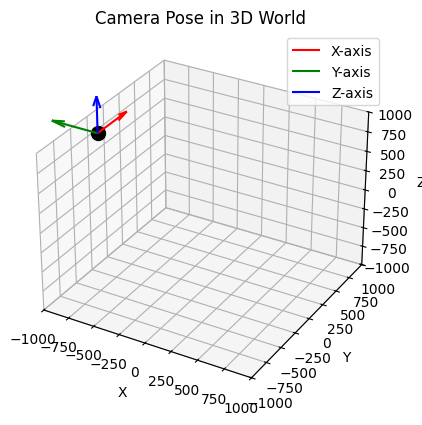

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Your extrinsic matrix
Rt = np.array([
    [-2.22044605e-16, -1.00000000e+00,  0.00000000e+00,  8.40000000e+02],
    [ 1.00000000e+00, -2.22044605e-16,  0.00000000e+00,  1.62000000e+03],
    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  9.00000000e+01]
])

# Extract R and t
R = Rt[:, :3]
t = Rt[:, 3]

# Calculate the camera position (C)
# C = -R_inverse * t. Since R is orthogonal, R_inverse = R_transpose
C = -R.T @ t

# Define the length of the axes for visualization
axis_length = 500

# Get the camera's axes
camera_x_axis = R.T[0, :] * axis_length
camera_y_axis = R.T[1, :] * axis_length
camera_z_axis = R.T[2, :] * axis_length

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the camera's position
ax.scatter(C[0], C[1], C[2], color='black', marker='o', s=100)

# Plot the camera's axes from its position
ax.quiver(C[0], C[1], C[2], camera_x_axis[0], camera_x_axis[1], camera_x_axis[2], color='red', label='X-axis')
ax.quiver(C[0], C[1], C[2], camera_y_axis[0], camera_y_axis[1], camera_y_axis[2], color='green', label='Y-axis')
ax.quiver(C[0], C[1], C[2], camera_z_axis[0], camera_z_axis[1], camera_z_axis[2], color='blue', label='Z-axis')

# Set plot limits and labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Camera Pose in 3D World")
ax.set_xlim([-1000, 1000])
ax.set_ylim([-1000, 1000])
ax.set_zlim([-1000, 1000])

plt.legend()
plt.show()

In [29]:
print("Camera Position (X, Y, Z):")
print(C)

Camera Position (X, Y, Z):
[-1620.   840.   -90.]
